<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [3]:
# pip install ydata_profiling
# pip install scikit-learn
# !pip install --upgrade ydata-sdk
# !pip install ipywidgets
# !pip install jupyterlab
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !pip install --upgrade pandas
# !pip install --upgrade ydata-profiling

In [26]:
%matplotlib inline

In [28]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px
import ydata_profiling
import os
os.environ["OMP_NUM_THREADS"] = "1"
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from ipywidgets import widgets

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [31]:
#Importation du fichier final
df_final = pd.read_csv('fichier_final.csv', sep=',')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire du fichier</h2>
</div>

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      236 non-null    object 
 1   Variation_population      236 non-null    float64
 2   Aide_ali                  236 non-null    float64
 3   Disponibilité intérieure  236 non-null    float64
 4   Exportations - Quantité   236 non-null    float64
 5   Importations - Quantité   236 non-null    float64
 6   Nourriture                236 non-null    float64
 7   Production                236 non-null    float64
 8   PIB                       236 non-null    float64
dtypes: float64(8), object(1)
memory usage: 16.7+ KB


In [36]:
df_final.head()

Zone  Variation_population  Aide_ali  Disponibilité intérieure  \
0     Afghanistan                  2.41       0.0              5.700000e+07   
1  Afrique du Sud                  1.37       0.0              2.118000e+09   
2         Albanie                 -0.05       0.0              4.700000e+07   
3         Algérie                  2.03    9476.0              2.770000e+08   
4       Allemagne                  0.56       0.0              1.739000e+09   

   Exportations - Quantité  Importations - Quantité    Nourriture  \
0                      0.0               29000000.0  5.500000e+07   
1               63000000.0              514000000.0  2.035000e+09   
2                      0.0               38000000.0  4.700000e+07   
3                      0.0                2000000.0  2.640000e+08   
4              646000000.0              842000000.0  1.609000e+09   

     Production      PIB  
0  2.800000e+07   2956.8  
1  1.667000e+09  14823.6  
2  1.300000e+07  14229.3  
3  2.750000e+08  13805.4  
4  1.514000e+09  61563.6

In [38]:
df_final.describe()

Variation_population       Aide_ali  Disponibilité intérieure  \
count            236.000000     236.000000              2.360000e+02   
mean               1.174237    3150.711864              4.953008e+08   
std                1.202109   31791.332640              1.880398e+09   
min               -3.920000       0.000000              0.000000e+00   
25%                0.365000       0.000000              0.000000e+00   
50%                1.050000       0.000000              4.100000e+07   
75%                1.947500       0.000000              2.027500e+08   
max                5.410000  465574.000000              1.826600e+10   

       Exportations - Quantité  Importations - Quantité    Nourriture  \
count             2.360000e+02             2.360000e+02  2.360000e+02   
mean              7.561441e+07             6.449153e+07  4.732966e+08   
std               3.934684e+08             1.633427e+08  1.835791e+09   
min               0.000000e+00             0.000000e+00  0.000000e+00   
25%               0.000000e+00             0.000000e+00  0.000000e+00   
50%               0.000000e+00             5.000000e+06  4.100000e+07   
75%               4.000000e+06             4.050000e+07  1.975000e+08   
max               4.223000e+09             1.069000e+09  1.810000e+10   

         Production            PIB  
count  2.360000e+02     236.000000  
mean   5.162373e+08   19276.696186  
std    2.134244e+09   24737.860665  
min    0.000000e+00       0.000000  
25%    0.000000e+00    2119.850000  
50%    2.000000e+07    9778.350000  
75%    1.687500e+08   28241.075000  
max    2.191400e+10  135547.000000

In [40]:
df_final.set_index('Zone',inplace=True)
df_final

Variation_population  Aide_ali  \
Zone                                                        
Afghanistan                                2.41       0.0   
Afrique du Sud                             1.37       0.0   
Albanie                                   -0.05       0.0   
Algérie                                    2.03    9476.0   
Allemagne                                  0.56       0.0   
...                                         ...       ...   
Îles Salomon                               2.64       0.0   
Îles Turques-et-Caïques                    1.48       0.0   
Îles Vierges américaines                  -0.07       0.0   
Îles Vierges britanniques                  0.76       0.0   
Îles Wallis-et-Futuna                     -2.01       0.0   

                           Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                           
Afghanistan                            5.700000e+07                      0.0   
Afrique du Sud                         2.118000e+09               63000000.0   
Albanie                                4.700000e+07                      0.0   
Algérie                                2.770000e+08                      0.0   
Allemagne                              1.739000e+09              646000000.0   
...                                             ...                      ...   
Îles Salomon                           3.000000e+06                      0.0   
Îles Turques-et-Caïques                0.000000e+00                      0.0   
Îles Vierges américaines               0.000000e+00                      0.0   
Îles Vierges britanniques              0.000000e+00                      0.0   
Îles Wallis-et-Futuna                  0.000000e+00                      0.0   

                           Importations - Quantité    Nourriture  \
Zone                                                               
Afghanistan                             29000000.0  5.500000e+07   
Afrique du Sud                         514000000.0  2.035000e+09   
Albanie                                 38000000.0  4.700000e+07   
Algérie                                  2000000.0  2.640000e+08   
Allemagne                              842000000.0  1.609000e+09   
...                                            ...           ...   
Îles Salomon                             6000000.0  3.000000e+06   
Îles Turques-et-Caïques                        0.0  0.000000e+00   
Îles Vierges américaines                       0.0  0.000000e+00   
Îles Vierges britanniques                      0.0  0.000000e+00   
Îles Wallis-et-Futuna                          0.0  0.000000e+00   

                             Production      PIB  
Zone                                              
Afghanistan                2.800000e+07   2956.8  
Afrique du Sud             1.667000e+09  14823.6  
Albanie                    1.300000e+07  14229.3  
Algérie                    2.750000e+08  13805.4  
Allemagne                  1.514000e+09  61563.6  
...                                 ...      ...  
Îles Salomon               0.000000e+00   2896.7  
Îles Turques-et-Caïques    0.000000e+00      0.0  
Îles Vierges américaines   0.000000e+00      0.0  
Îles Vierges britanniques  0.000000e+00      0.0  
Îles Wallis-et-Futuna      0.000000e+00      0.0  

[236 rows x 8 columns]

In [42]:
Profile=ProfileReport(df_final, title="Rapport de profil sur df_final")

In [44]:
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> - Analyse univariée - Les distribution</h3>
</div>

+ Pour la majorite des pays la population variés entre 0 et 3, elle suit pas une distribution normale, nous avons une moyenne de 1,1742373 avec un Minimum -3,92 et un Maximum 5,41 contre 28 valeur négatives qui représente 11,9% dans la variation de la population.
+ Pour la majorite des pays (210) nous avons une aide alimentaire quasi nulle qui represente 89% avec une moyenne de 3150,71 pour le reste des pays soit un maximun de 465574 et ne suit pas une distribution normale.
+ Pour la disponibilité interieure plus de la moitie des pays ont une disponibilté interieure et elles ne suivent pas une distribution normale avec une moyenne de 495 300 850 et un maximun de 18 266 000 000 seule une minorité de 28% qui n'ont pas de disponibilité interieure.
+ Pour les exportations plus de la moitie des pays ont une quantite d'exportation nulle et elles ne suivent pas une distribution normale avec une moyenne de 75 614 407 et un maximun de  4 223 000 000 seule une majorité de 64% qui ont une exportation nulle.
+ Pour les importations nous avons qu'une minorité des pays font des importations et elles ne suivent pas une distribution normale avec une moyenne de 63 391 525 et un maximun de 1 069 000 000.
+ Pour les nourritures (aliment de volaille) nous avons qu'une minorité des pays soit 28% qui n'ont pas de nourriture avec une moyenne de 473 296 610 de disponibilité de nouriiture pour le reste des pays et elles ne suivent pas une distribution normale.
+ Pour la production  nous avons qu'une minorité des pays soit 28% qui n'ont pas de nourriture avec une moyenne de 473 296 610 de disponibilité de nouriiture pour le reste des pays et elles ne suivent pas une distribution normale.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> - Analyse bivariée - Les analyses de corrélation</h3>
</div>

+ Nous avons une forte corrélation entre la Disponibilité intérieure avec les Exportations - Quantité, Importations - Quantité, Nourriture, Production.
+ Nous avons une forte corrélation entre la Exportations - Quantité avec les Disponibilité intérieure, Importations - Quantité, Nourriture, PIB, Production.
+ Nous avons une forte corrélation entre Importations - Quantité avec les Disponibilité intérieure, Exportations - Quantité, Nourriture, Production.
+ Nous avons une forte corrélation entre Nourriture avec les Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Production.
+ Nous avons une forte corrélation entre PIB avec les Exportations - Quantité.
+ Nous avons une forte corrélation entre Production avec les Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Nourriture.ture.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Normalisation des données avec le standard scaler et le centrage, réduction des données</h2>
</div>

In [54]:
# Création d'un df pour appliquer le standard scaler sur les colonnes numérique
colonnes_num = ['Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Production', 'Aide_ali', 'Variation_population', 'PIB']

scaler = StandardScaler()
std_scaler = scaler.fit_transform(df_final)

df_scaler = pd.DataFrame(std_scaler,index=df_final.index, columns=colonnes_num)

print("Ci dessous nous avons les données standardisées :")
df_scaler.head()

Ci dessous nous avons les données standardisées :


Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                     1.030181                -0.099317   
Afrique du Sud                  0.163196                -0.099317   
Albanie                        -1.020573                -0.099317   
Algérie                         0.713398                 0.199386   
Allemagne                      -0.512053                -0.099317   

                Importations - Quantité  Nourriture  Production  Aide_ali  \
Zone                                                                        
Afghanistan                   -0.233585   -0.192582   -0.217744 -0.228341   
Afrique du Sud                 0.864789   -0.032128    2.757784  0.852506   
Albanie                       -0.238914   -0.192582   -0.162528 -0.232708   
Algérie                       -0.116340   -0.192582   -0.383392 -0.114251   
Allemagne                      0.662808    1.452716    4.770100  0.619960   

                Variation_population       PIB  
Zone                                            
Afghanistan                -0.229250 -0.661115  
Afrique du Sud              0.540336 -0.180394  
Albanie                    -0.236293 -0.204469  
Algérie                    -0.113272 -0.221641  
Allemagne                   0.468495  1.713033

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Identification du nombre optimal par la méthode coude</h3>
</div>

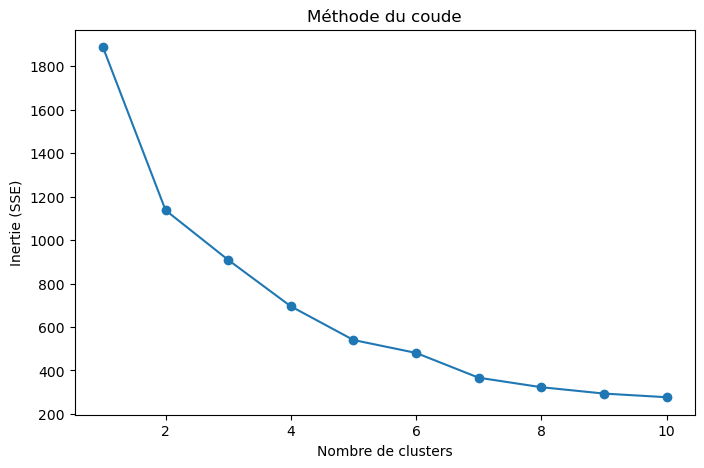

In [57]:
k_range = range(1, 11)
inertie = [KMeans(n_clusters=k, random_state=42).fit(df_scaler).inertia_ for k in k_range]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(list(k_range), inertie, marker='o')
ax.set_xlabel("Nombre de clusters")
ax.set_ylabel("Inertie (SSE)")
ax.set_title("Méthode du coude")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Identification du nombre optimal par la méthode silhouette</h3>
</div>

Pour k = 2, le score silhouette est : 0.855
Pour k = 3, le score silhouette est : 0.415
Pour k = 4, le score silhouette est : 0.427
Pour k = 5, le score silhouette est : 0.405
Pour k = 6, le score silhouette est : 0.402
Pour k = 7, le score silhouette est : 0.345
Pour k = 8, le score silhouette est : 0.327
Pour k = 9, le score silhouette est : 0.325
Pour k = 10, le score silhouette est : 0.318


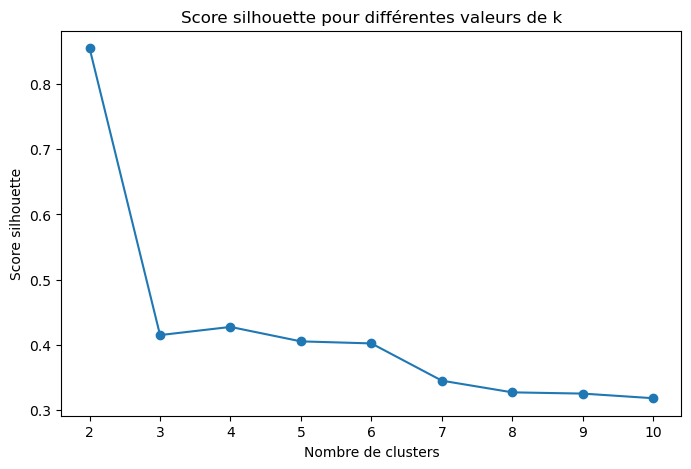

In [60]:
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaler)
    score = silhouette_score(df_scaler, labels)
    silhouette_scores.append(score)
    print(f"Pour k = {k}, le score silhouette est : {score:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score silhouette")
plt.title("Score silhouette pour différentes valeurs de k")
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - KMeans avec le Nombre de Clusters</h3>
</div>

In [63]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
km_cluster = kmeans.fit_predict(df_scaler)
df_final["Cluster_KM"] = km_cluster
print("Le nombre de ckuster avec KMeans est :")
print(df_final["Cluster_KM"].value_counts())

Le nombre de ckuster avec KMeans est :
Cluster_KM
1    233
0      3
Name: count, dtype: int64


In [65]:
km_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
df_final.groupby('Cluster_KM').mean()

Variation_population    Aide_ali  Disponibilité intérieure  \
Cluster_KM                                                               
0                       0.626667     0.00000              1.546967e+10   
1                       1.181288  3191.27897              3.024979e+08   

            Exportations - Quantité  Importations - Quantité    Nourriture  \
Cluster_KM                                                                   
0                      2.830333e+09             1.926667e+08  1.520000e+10   
1                      4.014592e+07             6.284120e+07  2.836824e+08   

              Production           PIB  
Cluster_KM                              
0           1.811700e+10  33237.366667  
1           2.896180e+08  19096.945064

In [69]:
df_final[df_final['Cluster_KM']==0]

Variation_population  Aide_ali  \
Zone                                                    
Brésil                                 0.79       0.0   
Chine, continentale                    0.47       0.0   
États-Unis d'Amérique                  0.62       0.0   

                       Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Brésil                             9.982000e+09             4.223000e+09   
Chine, continentale                1.816100e+10             5.760000e+08   
États-Unis d'Amérique              1.826600e+10             3.692000e+09   

                       Importations - Quantité    Nourriture    Production  \
Zone                                                                         
Brésil                               3000000.0  9.982000e+09  1.420100e+10   
Chine, continentale                452000000.0  1.751800e+10  1.823600e+10   
États-Unis d'Amérique              123000000.0  1.810000e+10  2.191400e+10   

                           PIB  Cluster_KM  
Zone                                        
Brésil                 17145.3           0  
Chine, continentale    16461.1           0  
États-Unis d'Amérique  66105.7           0

+ Le premier clustering est un peu biaisé par ces pays qui constituent des outliers.
  Ils ont une plus grande disponibilité intérieure et un PIB plus élevé.
  Grâce à leur production, ils sont en mesure de faire des exportations en quantité sur les excédents, et ils ne bénéficient pas non plus d'aide alimentaire. 
Ils peuvent aussi faire des importations en raison de la forte  variation de leur population.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Identification du nombre optimal par la méthode coude (KMeans sans les outliers)</h3>
</div>

In [73]:
df_final=df_final[~df_final.index.isin(["Brésil", "Chine, continentale", "États-Unis d'Amérique", "Yémen"])].drop('Cluster_KM',axis=1)

+ Nous avons exclu le Yémen en raison du fait qu'il n'a pas de PIB, avec une exportation nulle et une faible variation de la population.

In [76]:
scaler = StandardScaler()
std_scaler = scaler.fit_transform(df_final)

df_scaler_2 = pd.DataFrame(std_scaler,index=df_final.index, columns=colonnes_num)

print("Ci dessous nous avons les données standardisées :")
df_scaler_2.head()

Ci dessous nous avons les données standardisées :


Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                     1.023560                -0.120971   
Afrique du Sud                  0.160862                -0.120971   
Albanie                        -1.017053                -0.120971   
Algérie                         0.708343                 0.835694   
Allemagne                      -0.511047                -0.120971   

                Importations - Quantité  Nourriture  Production  Aide_ali  \
Zone                                                                        
Afghanistan                   -0.366331   -0.260494   -0.208098 -0.363540   
Afrique du Sud                 2.706040    0.146538    2.780053  2.781328   
Albanie                       -0.381238   -0.260494   -0.152647 -0.376246   
Algérie                       -0.038373   -0.260494   -0.374448 -0.031581   
Allemagne                      2.141058    3.913202    4.800905  2.104705   

                Variation_population       PIB  
Zone                                            
Afghanistan                -0.400655 -0.657498  
Afrique du Sud              2.104372 -0.176535  
Albanie                    -0.423581 -0.200622  
Algérie                    -0.023143 -0.217803  
Allemagne                   1.870529  1.717842

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5 - Identification du nombre optimal par la méthode coude sans les outliers</h3>
</div>

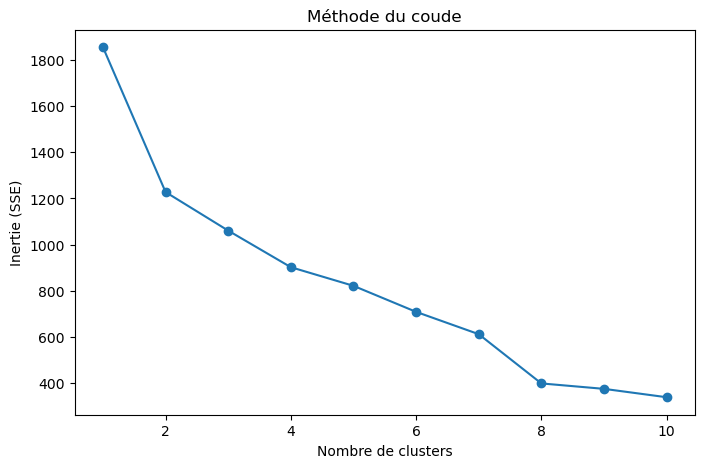

In [79]:
k_range = range(1, 11)
inertie = [KMeans(n_clusters=k, random_state=42).fit(df_scaler_2).inertia_ for k in k_range]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(list(k_range), inertie, marker='o')
ax.set_xlabel("Nombre de clusters")
ax.set_ylabel("Inertie (SSE)")
ax.set_title("Méthode du coude")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.6 - Identification du nombre optimal par la méthode silhouette sans les outliers</h3>
</div>

Pour k = 2, le score silhouette est : 0.591
Pour k = 3, le score silhouette est : 0.371
Pour k = 4, le score silhouette est : 0.382
Pour k = 5, le score silhouette est : 0.390
Pour k = 6, le score silhouette est : 0.348
Pour k = 7, le score silhouette est : 0.361
Pour k = 8, le score silhouette est : 0.379
Pour k = 9, le score silhouette est : 0.377
Pour k = 10, le score silhouette est : 0.370


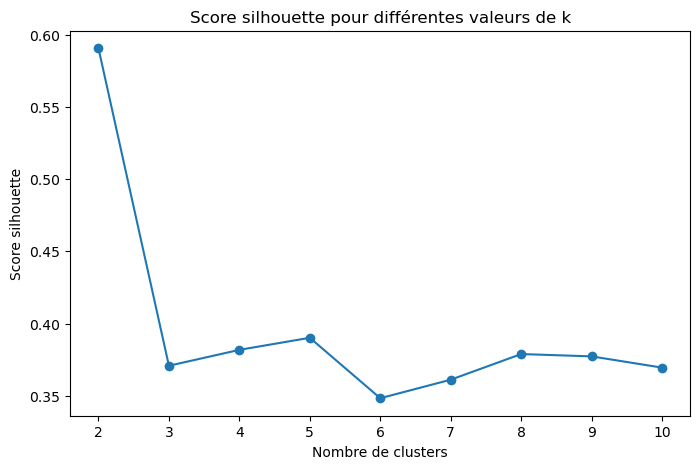

In [82]:
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaler_2)
    score = silhouette_score(df_scaler_2, labels)
    silhouette_scores.append(score)
    print(f"Pour k = {k}, le score silhouette est : {score:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score silhouette")
plt.title("Score silhouette pour différentes valeurs de k")
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.7 - KMeans avec le Nombre de Clusters sans les outliers</h3>
</div>

In [128]:
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
km_cluster = kmeans.fit_predict(df_scaler_2)
df_final["Cluster_KM"] = km_cluster
print("Le nombre de cluster avec KMeans est :")
print(df_final["Cluster_KM"].value_counts())

Le nombre de cluster avec KMeans est :
Cluster_KM
1    201
0     31
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.8 - Caractérisation des clusters avec une analyse bivariée entre les variables et les clusters (boxplot)</h3>
</div>

+ Ci dessous le boxplot sur l'ensemble des valeurs avec le subplots

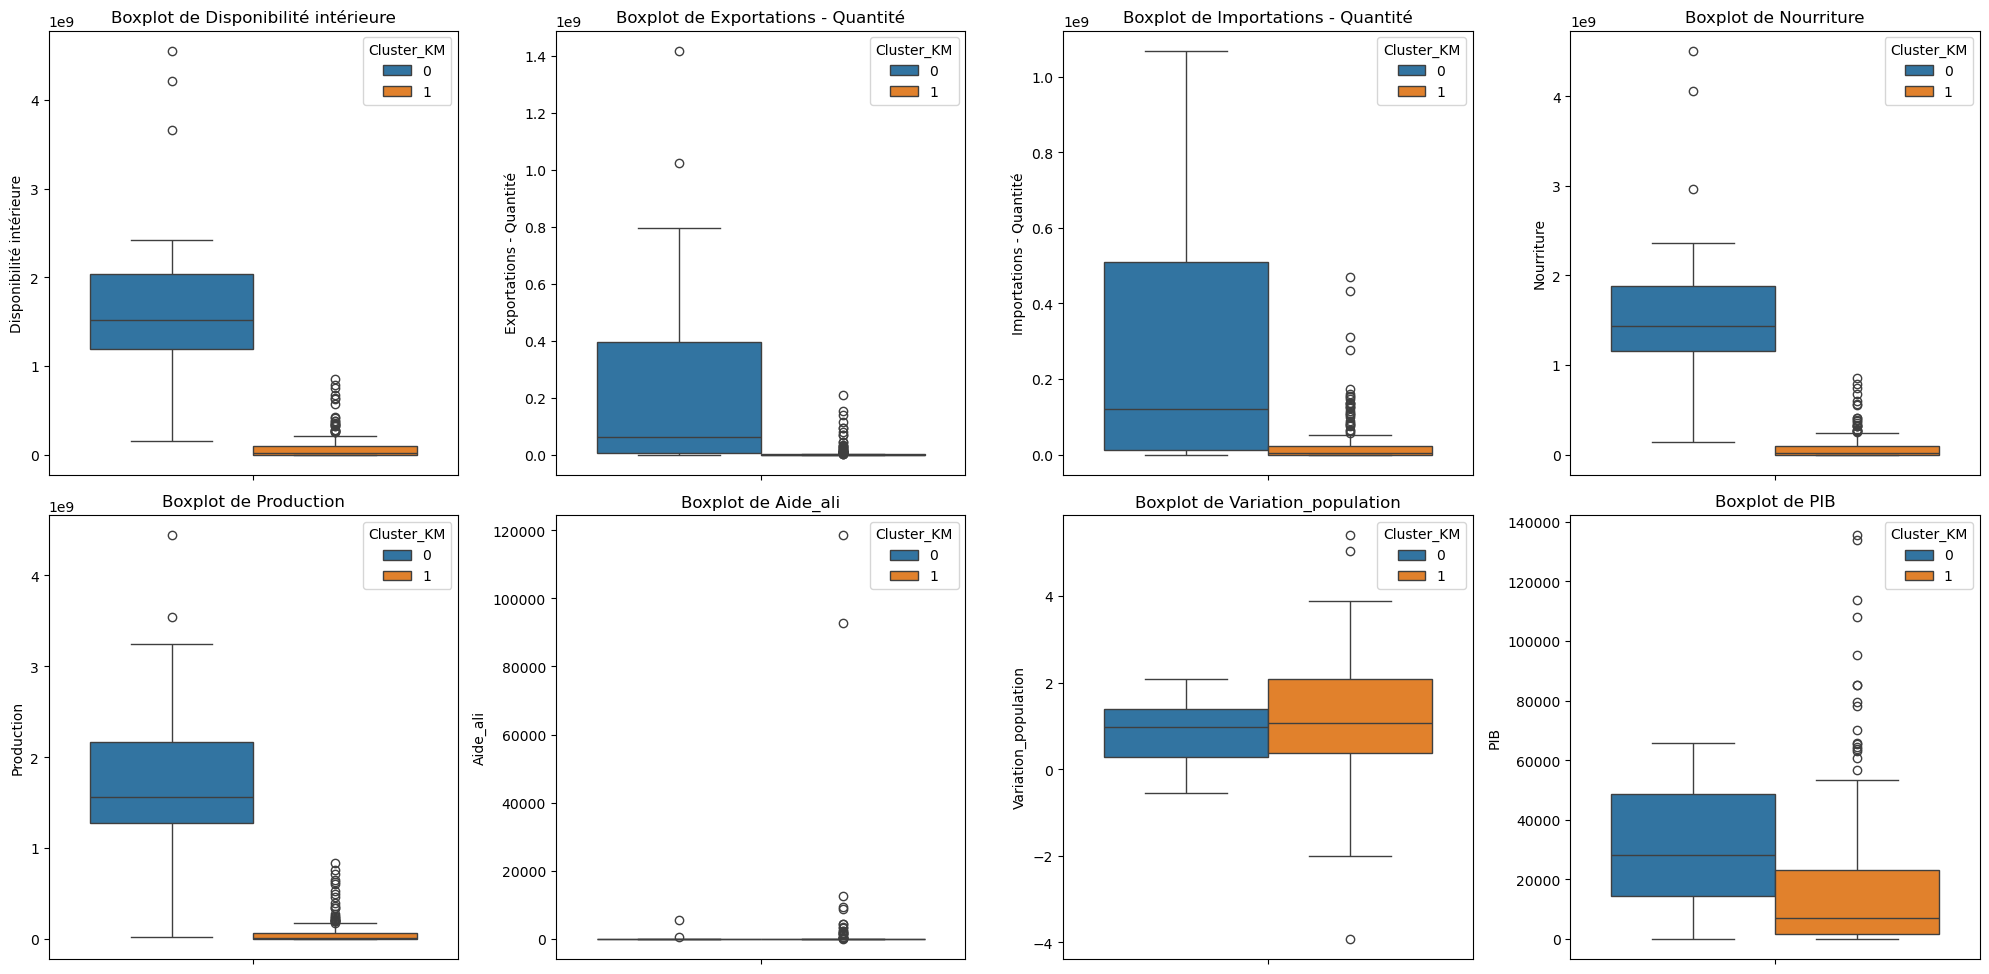

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(colonnes_num):
    sns.boxplot(data=df_final, y=col, hue='Cluster_KM', ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].legend(title='Cluster_KM')

plt.tight_layout()
plt.show()

Analyses des boxplots : 
+ Disponibilité intérieure : Nous remarquons une forte disponibilité intérieure des pays du cluster 0 par rapport au pays du cluster 1.
+ Exportation - Quantité : Nous remarquons que les pays du cluster 0 ont une forte exportation par rapport aux pays du cluster 1.
+ Importations - Quantité : Nous voyons que les pays du cluster 0 font une forte importation par rapport aux pays du cluster 1.
+ Nourriture : Nous voyons que les pays du cluster 0 ont plus de nourriture grâce à leur production par rapport aux pays du cluster 1.
+ Production : Nous remarquons que les pays du cluster 0 ont une forte production par rapport aux pays du cluster 1.
+ Aide alimentaire : Aucune donnée interprétable n'est disponible concernant le groupe. En se basant sur les valeurs du tableau, il est évident que les pays du cluster 1 reçoivent une aide supérieure à celle des pays du cluster 0.
+ Variation de la population : Nous remarquons que les pays du cluster 1 ont plus de variation de la population par rapport aux pays du cluster 0, avec un écart pas trop conséquent.
+ PIB : Nous remarquons que les pays du cluster 0 ont un fort PIB par rapport aux pays du cluster 1.

In [135]:
caracterisation_km = df_final.groupby("Cluster_KM")[colonnes_num].mean()
print("Caractérisation des clusters (KMeans) :")
print(caracterisation_km)

Caractérisation des clusters (KMeans) :
            Disponibilité intérieure  Exportations - Quantité  \
Cluster_KM                                                      
0                       1.708548e+09             2.543226e+08   
1                       8.592537e+07             7.313433e+06   

            Importations - Quantité    Nourriture    Production     Aide_ali  \
Cluster_KM                                                                     
0                      2.916129e+08  1.589161e+09  1.709258e+09   195.096774   
1                      2.748259e+07  8.257214e+07  7.127363e+07  1352.965174   

            Variation_population           PIB  
Cluster_KM                                      
0                       0.873226  30136.335484  
1                       1.222786  17489.362189  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5. - Classification Ascendante Hiérarchique (CAH)</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - Dendrogramme</h3>
</div>

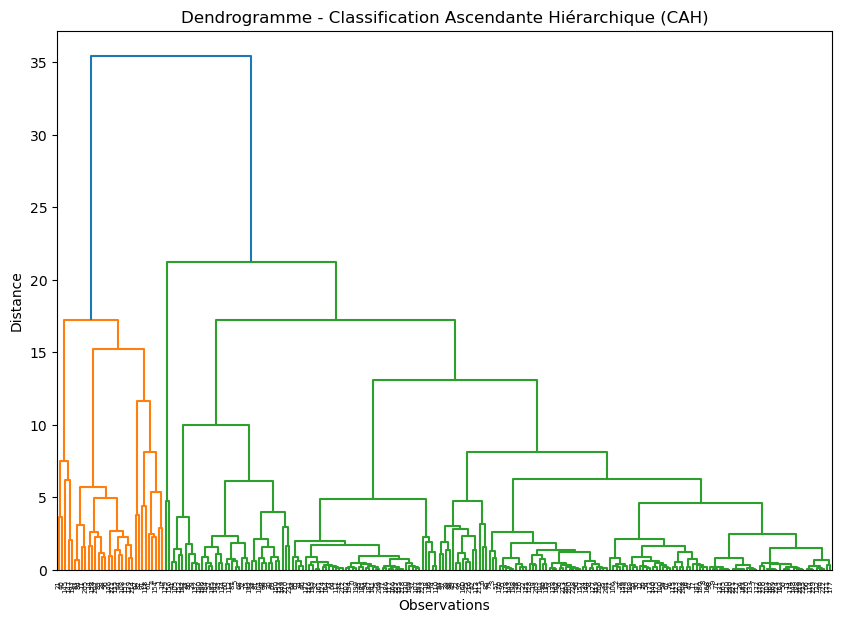

In [96]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaler_2, method="ward"))
plt.title("Dendrogramme - Classification Ascendante Hiérarchique (CAH)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2 - Application de la CAH et Attribution des Clusters</h3>
</div>

In [137]:
cah = AgglomerativeClustering(n_clusters=2, linkage="ward")
cluster_labels_cah = cah.fit_predict(df_scaler_2)

df_final["Cluster_CAH"] = cluster_labels_cah
print("Distribution des clusters CAH :")
print(df_final["Cluster_CAH"].value_counts())

Distribution des clusters CAH :
Cluster_CAH
0    200
1     32
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.3 - Réalisation d'une Analyse en Composantes Principales (ACP) ou (PCA)</h3>
</div>

In [102]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(df_scaler_2)
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca["Cluster_CAH"] = df_final["Cluster_CAH"].values
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.913789 -0.814582 -0.339743  0.637395 -0.104670  0.037457  0.004342   
1  4.849486 -1.240285 -0.198656  0.237040  0.180934  1.453480  0.093958   
2 -0.639364  0.570623  0.095126 -0.772909 -0.410818  0.370156  0.006739   
3 -0.392295 -0.819502  0.598236  0.270643  0.358407 -0.270738  0.015588   
4  6.197598  2.411574  0.617802  2.773476 -0.695325  1.138790 -0.029379   

        PC8  Cluster_CAH  
0 -0.005313            0  
1  0.054932            1  
2  0.009789            0  
3 -0.006089            0  
4  0.143076            1  


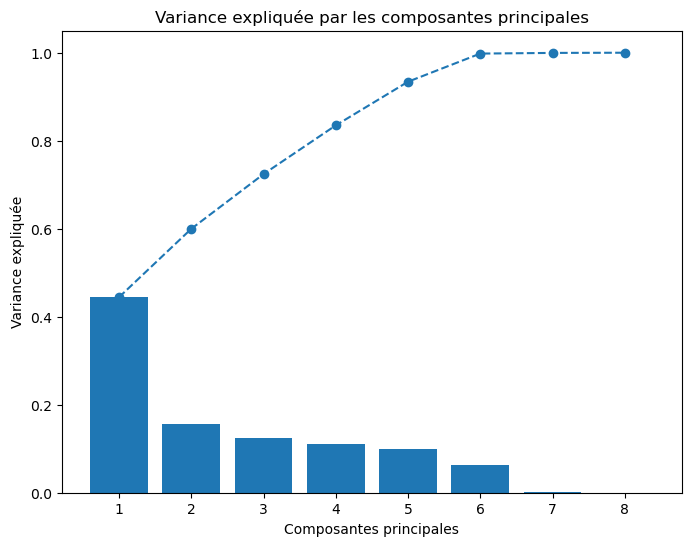

In [104]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), linestyle='--', marker='o')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.show()

In [106]:
coefficients = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=colonnes_num)

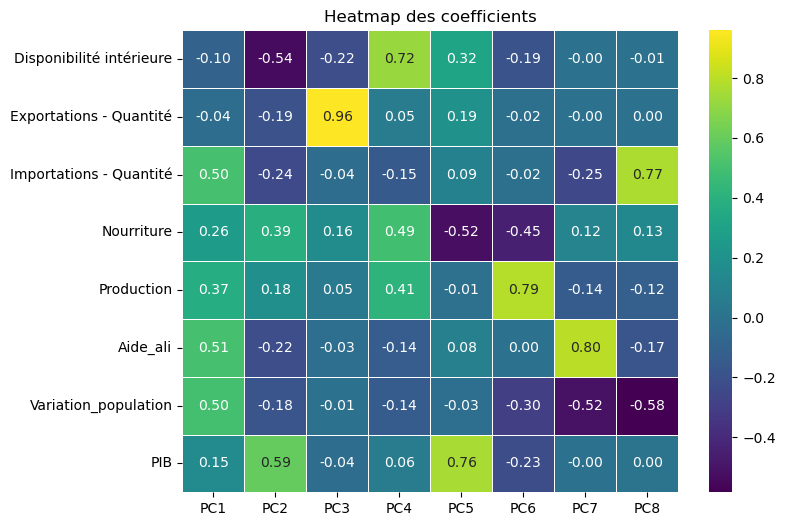

In [108]:
plt.figure(figsize=(8,6))
sns.heatmap(coefficients, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, cbar=True)
plt.title("Heatmap des coefficients")
plt.show()

Analyse des corrélations entre les composantes principales par rapport aux variables.
- Nous constatons une forte correlation entre PC3 et les exportations avec 0.96, contre 0.80 pour PC7 et les aides alimentaires, PC3 avec 0.79 sur les productions, PC8 avec 0.77 pour les importations, PC5 avec 0.76 et PC4 avec 0.72 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.4 - Le cercle de corrélation entre le composantes et les variables </h3>
</div>

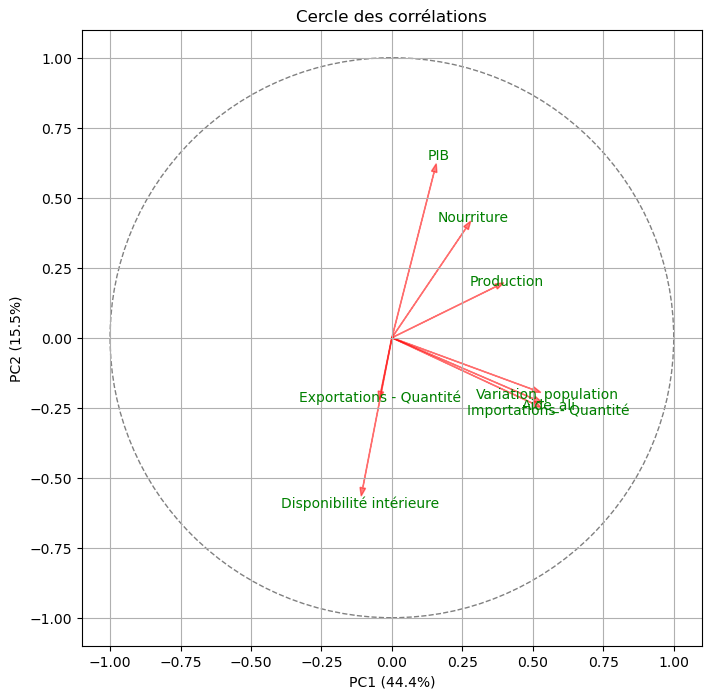

In [112]:
plt.figure(figsize=(8,8))
cercle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(cercle)

for i, var in enumerate(colonnes_num):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', alpha=0.5, head_width=0.02)
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, var,
             color='green', ha='center', va='center')

plt.xlabel('PC1 ({}%)'.format(round(pca.explained_variance_ratio_[0]*100,1)))
plt.ylabel('PC2 ({}%)'.format(round(pca.explained_variance_ratio_[1]*100,1)))
plt.title('Cercle des corrélations')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

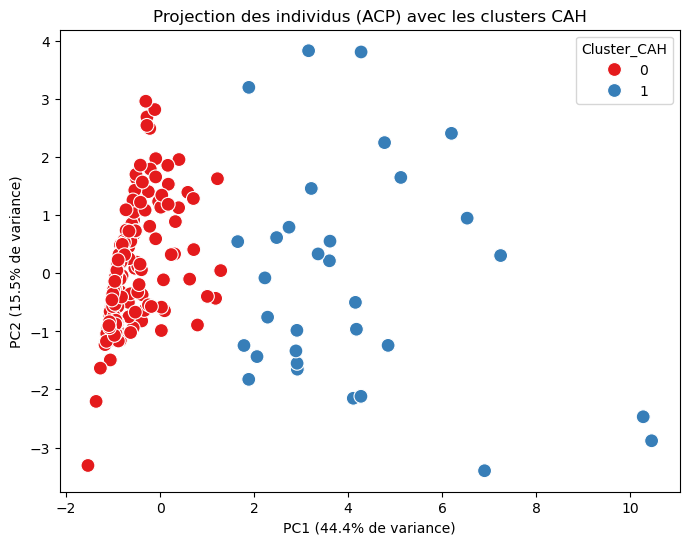

Variance expliquée par PC1 et PC2 : [4.44259021e-01 1.55456448e-01 1.24369299e-01 1.10802370e-01
 9.92240489e-02 6.39471880e-02 1.50655861e-03 4.35067211e-04]


In [148]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_CAH", palette="Set1", s=100)
plt.title("Projection des individus (ACP) avec les clusters CAH")
plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100,1)}% de variance)")
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100,1)}% de variance)")
plt.show()

print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)

- Préconisations de pays où d'étendre

In [151]:
moyennes_clusters = df_final.groupby("Cluster_KM")[colonnes_num].mean()
print("Moyennes des variables clés par cluster (KMeans) :")
moyennes_clusters.head()

Moyennes des variables clés par cluster (KMeans) :


Disponibilité intérieure  Exportations - Quantité  \
Cluster_KM                                                      
0                       1.708548e+09             2.543226e+08   
1                       8.592537e+07             7.313433e+06   

            Importations - Quantité    Nourriture    Production     Aide_ali  \
Cluster_KM                                                                     
0                      2.916129e+08  1.589161e+09  1.709258e+09   195.096774   
1                      2.748259e+07  8.257214e+07  7.127363e+07  1352.965174   

            Variation_population           PIB  
Cluster_KM                                      
0                       0.873226  30136.335484  
1                       1.222786  17489.362189

In [119]:
somme_clusters = moyennes_clusters.sum(axis=1)
print("Somme des moyennes des variables clés par cluster :")
print(somme_clusters)

cluster_fort_potentiel = somme_clusters.idxmax()
print(f"Le cluster présentant un fort potentiel est : {cluster_fort_potentiel}")

Somme des moyennes des variables clés par cluster :
Cluster_KM
0    5.552934e+09
1    2.745860e+08
dtype: float64
Le cluster présentant un fort potentiel est : 0


In [121]:
df_final.reset_index(inplace=True)

In [153]:
pays_fort_potentiel = df_final[df_final["Cluster_KM"] == cluster_fort_potentiel]["Zone"].unique()
print("Pays à fort potentiel recommandés")
print(f"\nNous avons un nombre total de {len(pays_fort_potentiel)} pour les pays à fort potentiel, ci dessous la liste :")
for pays in pays_fort_potentiel:
    print(pays)

Pays à fort potentiel recommandés

Nous avons un nombre total de 31 pour les pays à fort potentiel, ci dessous la liste :
Afrique du Sud
Allemagne
Arabie saoudite
Argentine
Australie
Belgique
Canada
Chine - RAS de Hong-Kong
Colombie
Espagne
France
Fédération de Russie
Inde
Indonésie
Iran (République islamique d')
Italie
Japon
Malaisie
Mexique
Myanmar
Pakistan
Pays-Bas
Philippines
Pologne
Pérou
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Thaïlande
Turquie
Ukraine
Viet Nam
Égypte
